In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load DataFrames

In [44]:
df_prices = pd.read_csv('../data/interim/Data_Day3.csv')
df_prices.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,7.459677
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,3.040000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,2.209677
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,5.400000


In [45]:
df_address = pd.read_csv('../data/external/enderecos.csv', sep = ',', encoding = 'utf_8')
df_address.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_19648\1600510827.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_address = pd.read_csv('../data/external/enderecos.csv', sep = ',', encoding = 'utf_8')


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.0,-30.882674,-55.548830
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.0,-30.855721,-55.555757
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.0,-30.863149,-55.552083
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.0,-30.864415,-55.545860


In [46]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113886 entries, 0 to 1113885
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   tipo_logr        1113559 non-null  object 
 1   logr_nome        1113566 non-null  object 
 2   logr_compl       1113567 non-null  object 
 3   numero           28810 non-null    object 
 4   bairro           1113546 non-null  object 
 5   nome_localidade  1093788 non-null  object 
 6   sigla_uf         1093788 non-null  object 
 7   cep              1093788 non-null  float64
 8   latitude         1090660 non-null  float64
 9   longitude        1090660 non-null  float64
dtypes: float64(3), object(7)
memory usage: 85.0+ MB


In [47]:
df_address.shape

(1113886, 10)

In [48]:
df_address['sigla_uf'].unique()

array(['RS', 'SP', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO',
       'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
       'RO', 'RR', 'SC', 'SE', 'TO', nan], dtype=object)

In [49]:
#Get only addresses in Sao Paulo State
df_address = df_address[df_address['sigla_uf'] == "SP"]

In [50]:
df_address['sigla_uf'].unique()

array(['SP'], dtype=object)

In [51]:
df_address.shape

(298124, 10)

**We will use the street address to relate the two dataframes. For this, the street address must be in the same format in both of the dataframes** 

In [52]:
df_address['Rua_Compare'] = (df_address['tipo_logr'] + " " + df_address['logr_nome']).str.lower().str.strip()

In [53]:
df_address.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,Rua_Compare
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588,rua joão bandini


**Save this dataframe for future use**

In [54]:
df_address.to_csv('../data/interim/Data_Day4_Address.csv', index = False)

In [55]:
df_prices["Rua_Compare"] = df_prices["Rua"].str.extract(r'(^[\w ]+)')
df_prices["Rua_Compare"] = df_prices["Rua_Compare"].str.lower().str.strip()

In [56]:
df_prices.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2,Rua_Compare
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,7.459677,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,3.040000,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,2.209677,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,5.400000,rua tobias barreto


In [57]:
df_merged = df_prices.merge(df_address[['cep','latitude','longitude','Rua_Compare']], how = 'left', left_on = 'Rua_Compare', right_on = "Rua_Compare")

In [58]:
df_merged

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2,Rua_Compare,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira,11443160.0,-23.975993,-46.201317
1,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira,4061000.0,-23.615793,-46.648162
2,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira,4061001.0,-23.615793,-46.648162
3,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira,4061002.0,-23.615793,-46.648162
4,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira,4061003.0,-23.615793,-46.648162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85267,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1.500,5.617978,avenida odila,4058020.0,-23.609093,-46.647258
85268,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1.500,5.617978,avenida odila,4058021.0,-23.608378,-46.647774
85269,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,0.665,7.000000,rua tapuçu,4671185.0,-23.661018,-46.691521
85270,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1.050,5.121951,rua estero belaco,4145020.0,-23.616124,-46.632983


**There are duplicate entries, remove them**

In [59]:
df_merged.drop_duplicates(subset=df_prices.columns, inplace = True)

In [60]:
df_merged

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2,Rua_Compare,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira,11443160.0,-23.975993,-46.201317
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,7.459677,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,3.040000,rua alba valdez,4845200.0,-23.752990,-46.695889
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,2.209677,NaN,18125000.0,-23.531043,-47.255023
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,5.400000,rua tobias barreto,13474663.0,-22.698901,-47.294461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84982,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,0.960,6.114650,rua pedro teixeira,4550010.0,-23.603517,-46.678302
84983,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1.500,5.617978,avenida odila,4058020.0,-23.609093,-46.647258
84985,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,0.665,7.000000,rua tapuçu,4671185.0,-23.661018,-46.691521
84986,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1.050,5.121951,rua estero belaco,4145020.0,-23.616124,-46.632983


**Now we have to connect the latitude and longitude with the senso sectors**

For this, we will need to use another database with that information

I'll use the code in Alura's notebook for this part

In [61]:
import geopandas as gpd
from shapely.geometry import Point

In [62]:
setor_censo = gpd.read_file(
'../data/external/Data_Geopandas/35SEE250GC_SIR.shp'
)

In [63]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

In [64]:
df_merged["Point"] = ""
for i in df_merged.index:
    df_merged["Point"][i] = Point(df_merged["longitude"][i], df_merged["latitude"][i])

df_merged['setor_censo'] = df_merged["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
df_merged

C:\Users\andre\AppData\Local\Temp\ipykernel_19648\4026646355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["Point"][i] = Point(df_merged["longitude"][i], df_merged["latitude"][i])


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2,Rua_Compare,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000,avenida itacira,11443160.0,-23.975993,-46.201317,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,7.459677,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,3.040000,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,2.209677,NaN,18125000.0,-23.531043,-47.255023,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,5.400000,rua tobias barreto,13474663.0,-22.698901,-47.294461,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84982,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,0.960,6.114650,rua pedro teixeira,4550010.0,-23.603517,-46.678302,POINT (-46.6783021 -23.6035167),355030835000027
84983,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1.500,5.617978,avenida odila,4058020.0,-23.609093,-46.647258,POINT (-46.6472577 -23.6090928),355030877000099
84985,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,0.665,7.000000,rua tapuçu,4671185.0,-23.661018,-46.691521,POINT (-46.6915206 -23.661018),355030816000087
84986,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1.050,5.121951,rua estero belaco,4145020.0,-23.616124,-46.632983,POINT (-46.632983 -23.6161237),355030877000052


In [65]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8253 entries, 0 to 84987
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rua          5520 non-null   object 
 1   Bairro       8245 non-null   object 
 2   Cidade       8253 non-null   object 
 3   Metragem     8253 non-null   int64  
 4   Quartos      8253 non-null   int64  
 5   Banheiros    8253 non-null   int64  
 6   Vagas        8253 non-null   int64  
 7   Valor        8253 non-null   float64
 8   Valor/m2     8253 non-null   float64
 9   Rua_Compare  5520 non-null   object 
 10  cep          8140 non-null   float64
 11  latitude     8140 non-null   float64
 12  longitude    8140 non-null   float64
 13  Point        8253 non-null   object 
 14  setor_censo  3756 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 1.3+ MB


Convert column 'setor_censo' to numeric

In [66]:
df_merged['setor_censo'] = pd.to_numeric(df_merged['setor_censo'])

**Now that we have the senso sector information, we can merge with the dataframe from IBGE**

In [67]:
df_ibge = pd.read_csv('../data/interim/IBGE_cleaned.csv')

In [68]:
df_prices_ibge = pd.merge(left = df_merged, right = df_ibge, how = "left", left_on = "setor_censo", right_on = "Cod_setor")

In [69]:
pd.set_option('display.max_columns', None)
df_prices_ibge.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2,Rua_Compare,cep,latitude,longitude,Point,setor_censo,Cod_setor,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.0000,7.000000,avenida itacira,11443160.0,-23.975993,-46.201317,POINT (-46.2013172 -23.975993),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.7000,7.459677,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),3.550309e+14,3.550309e+14,355030871.0,SANTO AMARO,3.550309e+10,SANTO AMARO,1.0,0.0,136.0,425.0,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.3800,3.040000,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14,3.550308e+14,355030830.0,GRAJAU,3.550308e+10,GRAJAU,1.0,0.0,142.0,493.0,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.6850,2.209677,NaN,18125000.0,-23.531043,-47.255023,POINT (-47.2550228 -23.5310431),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.5400,5.400000,rua tobias barreto,13474663.0,-22.698901,-47.294461,POINT (-47.2944609 -22.6989009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1.9800,4.500000,rua graham bell,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14,3.550309e+14,355030865.0,RAPOSO TAVARES,3.550309e+10,RAPOSO TAVARES,1.0,0.0,107.0,376.0,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,0.8500,5.862069,rua francisco paulo,3306050.0,-23.522254,-46.516452,POINT (-46.5164525 -23.5222541),3.550309e+14,3.550309e+14,355030859.0,PENHA,3.550309e+10,PENHA,1.0,0.0,222.0,654.0,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,0.4500,3.000000,rua guilherme valente,5818280.0,-23.664734,-46.733940,POINT (-46.7339399 -23.6647336),3.550308e+14,3.550308e+14,355030846.0,JARDIM SAO LUIS,3.550308e+10,JARDIM SAO LUIS,1.0,0.0,305.0,984.0,3.23,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,0.1999,4.164583,rua sagrada família,8140520.0,-23.587512,-46.611529,POINT (-46.6115287 -23.5875122),3.550308e+14,3.550308e+14,355030834.0,IPIRANGA,3.550308e+10,IPIRANGA,1.0,0.0,265.0,702.0,2.65,1.39,1692.15,3484810.47,2029.05,3495083.93,1501.11,3319944.47,1998.54,3426163.27
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,0.5850,5.131579,rua tapaji,3207050.0,-23.600469,-46.561517,POINT (-46.5615172 -23.6004694),3.550309e+14,3.550309e+14,355030893.0,VILA PRUDENTE,3.550309e+10,VILA PRUDENTE,1.0,0.0,312.0,906.0,2.90,1.55,1040.08,1253314.41,1340.93,1212255.49,840.56,1227374.07,1308.92,1298350.85


Drop rows with NaN value in 'setor_censo'

In [70]:
df_prices_ibge.drop(df_prices_ibge[df_prices_ibge['setor_censo'].isnull()].index.tolist(), axis = 0, inplace = True)

In [71]:
df_prices_ibge.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2,Rua_Compare,cep,latitude,longitude,Point,setor_censo,Cod_setor,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.7000,7.459677,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),3.550309e+14,3.550309e+14,355030871.0,SANTO AMARO,3.550309e+10,SANTO AMARO,1.0,0.0,136.0,425.0,3.13,1.96,7600.44,3.677893e+07,7890.53,3.588691e+07,4149.00,2.676068e+07,6063.92,2.750267e+07
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.3800,3.040000,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14,3.550308e+14,355030830.0,GRAJAU,3.550308e+10,GRAJAU,1.0,0.0,142.0,493.0,3.47,3.06,805.13,7.691888e+05,1011.75,7.574334e+05,518.77,4.266728e+05,858.51,4.143789e+05
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1.9800,4.500000,rua graham bell,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14,3.550309e+14,355030865.0,RAPOSO TAVARES,3.550309e+10,RAPOSO TAVARES,1.0,0.0,107.0,376.0,3.51,2.31,1026.36,2.721687e+05,1143.96,1.677336e+05,735.67,3.670881e+05,1086.94,1.596225e+05
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,0.8500,5.862069,rua francisco paulo,3306050.0,-23.522254,-46.516452,POINT (-46.5164525 -23.5222541),3.550309e+14,3.550309e+14,355030859.0,PENHA,3.550309e+10,PENHA,1.0,0.0,222.0,654.0,2.95,2.18,1580.84,4.440790e+06,1897.01,4.730743e+06,1284.45,2.578385e+06,1743.39,2.699813e+06
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,0.4500,3.000000,rua guilherme valente,5818280.0,-23.664734,-46.733940,POINT (-46.7339399 -23.6647336),3.550308e+14,3.550308e+14,355030846.0,JARDIM SAO LUIS,3.550308e+10,JARDIM SAO LUIS,1.0,0.0,305.0,984.0,3.23,2.13,1613.93,3.333239e+07,1721.15,3.536936e+07,880.61,1.270017e+07,1333.63,1.864021e+07
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,0.1999,4.164583,rua sagrada família,8140520.0,-23.587512,-46.611529,POINT (-46.6115287 -23.5875122),3.550308e+14,3.550308e+14,355030834.0,IPIRANGA,3.550308e+10,IPIRANGA,1.0,0.0,265.0,702.0,2.65,1.39,1692.15,3.484810e+06,2029.05,3.495084e+06,1501.11,3.319944e+06,1998.54,3.426163e+06
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,0.5850,5.131579,rua tapaji,3207050.0,-23.600469,-46.561517,POINT (-46.5615172 -23.6004694),3.550309e+14,3.550309e+14,355030893.0,VILA PRUDENTE,3.550309e+10,VILA PRUDENTE,1.0,0.0,312.0,906.0,2.90,1.55,1040.08,1.253314e+06,1340.93,1.212255e+06,840.56,1.227374e+06,1308.92,1.298351e+06
10,"Rua Vigário João Álvares, 66",Vila Monumento,São Paulo,261,4,4,3,0.7000,2.681992,rua vigário joão álvares,1551040.0,-23.575724,-46.611932,POINT (-46.6119322 -23.5757239),3.550308e+14,3.550308e+14,355030834.0,IPIRANGA,3.550308e+10,IPIRANGA,1.0,0.0,341.0,936.0,2.74,2.28,4180.64,1.448327e+07,4255.52,1.442385e+07,2417.49,9.922369e+06,3173.84,1.062724e+07
13,"Rua Antônio Pereira Mendes, 98",Jardim Prudência,São Paulo,251,3,5,4,1.7000,6.772908,rua antônio pereira mendes,4648235.0,-23.654041,-46.676188,POINT (-46.6761882 -23.654041),3.550308e+14,3.550308e+14,355030822.0,CIDADE ADEMAR,3.550308e+10,CIDADE ADEMAR,1.0,0.0,277.0,778.0,2.81,1.52,9723.22,4.398509e+09,14798.53,6.631596e+09,6394.31,2.798796e+09,12736.78,5.501422e+09
14,"Rua João Antunes Carvalho, 75",Lauzane Paulista,São Paulo,300,4,5,4,1.1500,3.833333,rua joão antunes carvalho,2435100.0,-23.481381,-46.642185,POINT (-46.6421852 -23.481381),3.550309e+14,3.550309e+14,355030851.0,MANDAQUI,3.550309e+10,MANDAQUI,1.0,0.0,284.0,834.0,2.94,1.42,3758.35,1.405423e+07,4027.81,1.397624e+07,2256.57,9.413529e+06,3121.52,1.032352e+07


## Save this dataframe for use in day 5


In [72]:
df_prices_ibge.to_csv('../data/interim/Data_Day4.csv', index = False)

## Explore relation between price and ibge data

<AxesSubplot:xlabel='V005', ylabel='Valor'>

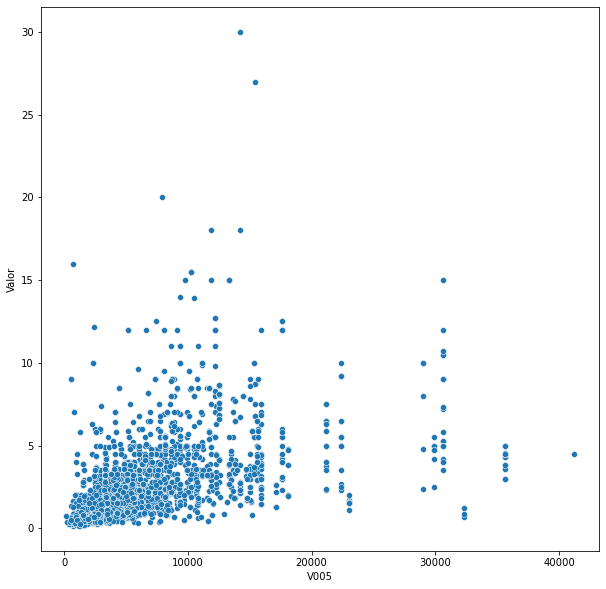

In [73]:
#Scatter plot between price and mean monthly income divided by number of houses (houses with and wihout income)
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_prices_ibge, x="V005", y="Valor")

<AxesSubplot:xlabel='V007', ylabel='Valor'>

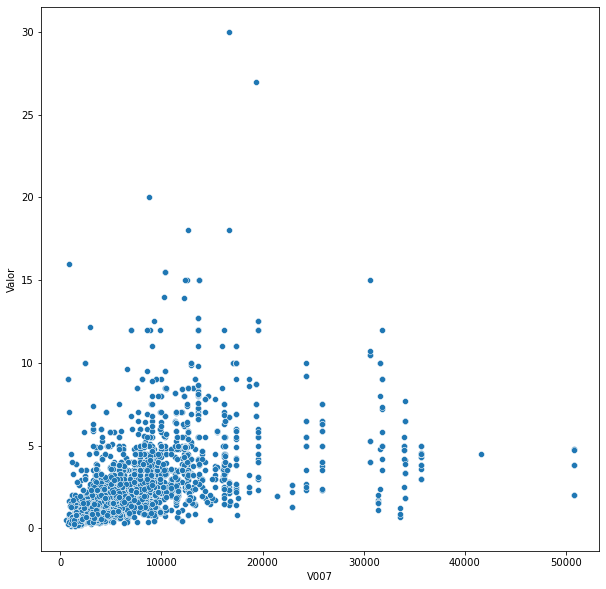

In [74]:
#Scatter plot between price and mean monthly income divided by number of houses (only houses with income)
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_prices_ibge, x="V007", y="Valor")

<AxesSubplot:xlabel='V009', ylabel='Valor'>

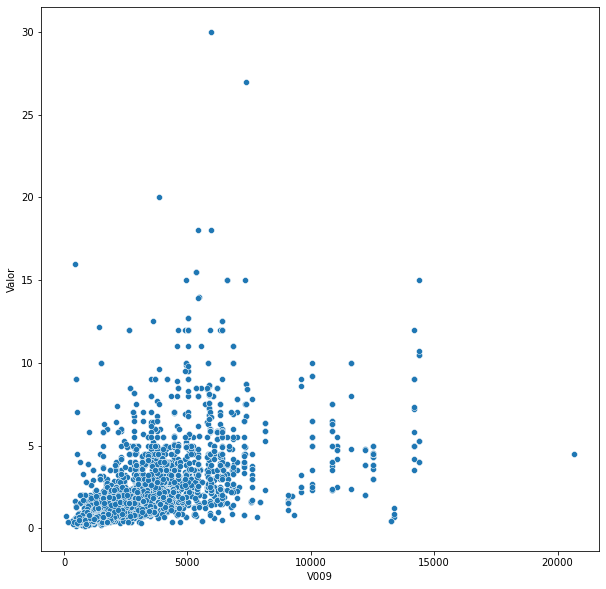

In [75]:
#Scatter plot between price and mean monthly income of people with more than 10 years (people with and wihout income)
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_prices_ibge, x="V009", y="Valor")

<AxesSubplot:xlabel='V011', ylabel='Valor'>

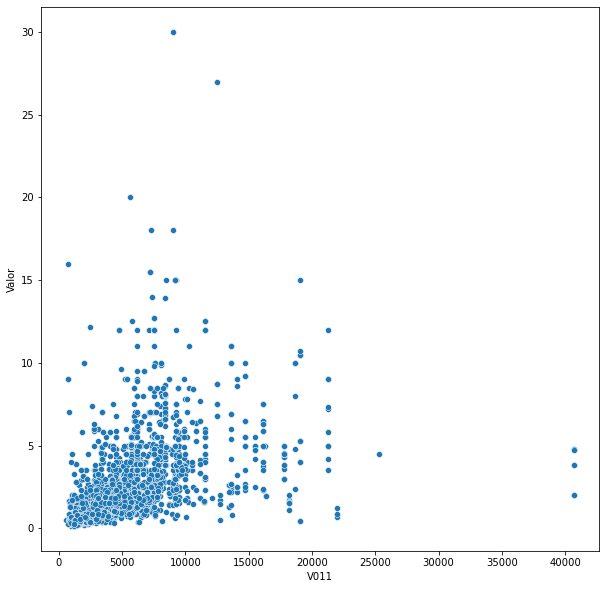

In [76]:
#Scatter plot between price and mean monthly income of people with more than 10 years (only people with income)
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_prices_ibge, x="V011", y="Valor")

The plots are very similar to each other.

## Correlation between columns

**Search if some of the columns have strong correlation with the price ('Valor') column.**

In [77]:
df_prices_ibge.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2,cep,latitude,longitude,setor_censo,Cod_setor,Cod_distrito,Cod_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.000000,0.529833,0.553198,0.631202,0.699331,0.098629,0.197159,-0.033958,-0.283431,-0.037508,-0.037468,-0.037468,-0.037468,-0.004658,0.001844,-0.333905,-0.280423,0.307712,0.179597,0.609238,0.167711,0.606603,0.128592,0.558693,0.182016,0.560882,0.129280
Quartos,0.529833,1.000000,0.567118,0.457658,0.438354,0.130755,0.145122,-0.043747,-0.244992,-0.032018,-0.031987,-0.031987,-0.031987,-0.012262,-0.017262,-0.220867,-0.185684,0.193594,0.105712,0.397464,0.142338,0.408248,0.122589,0.389014,0.146846,0.397599,0.118594
Banheiros,0.553198,0.567118,1.000000,0.455630,0.519017,0.220580,0.129750,-0.036255,-0.278039,-0.033816,-0.033735,-0.033735,-0.033735,-0.024548,-0.014304,-0.255906,-0.218972,0.208834,0.083619,0.453752,0.137729,0.458580,0.110658,0.442887,0.145809,0.448432,0.110573
Vagas,0.631202,0.457658,0.455630,1.000000,0.467865,0.084547,0.155097,-0.051198,-0.210376,-0.003553,-0.003475,-0.003474,-0.003474,-0.021853,0.009594,-0.251783,-0.197264,0.262091,0.131531,0.397815,0.119344,0.398046,0.087440,0.367227,0.131381,0.380659,0.093201
Valor,0.699331,0.438354,0.519017,0.467865,1.000000,0.645397,0.117851,0.015920,-0.274030,-0.117666,-0.117638,-0.117638,-0.117638,-0.022157,0.012055,-0.282487,-0.252941,0.174636,0.126528,0.542995,0.133249,0.536813,0.092331,0.545369,0.155988,0.528202,0.102973
Valor/m2,0.098629,0.130755,0.220580,0.084547,0.645397,1.000000,-0.024837,0.050955,-0.194060,-0.152753,-0.152723,-0.152723,-0.152723,-0.035287,-0.004979,-0.112042,-0.162828,-0.152669,-0.083453,0.274819,0.043373,0.263572,0.019882,0.348541,0.051943,0.300641,0.023424
cep,0.197159,0.145122,0.129750,0.155097,0.117851,-0.024837,1.000000,-0.225133,-0.359798,-0.093389,-0.093615,-0.093615,-0.093615,-0.021062,0.020376,-0.307462,-0.242207,0.266657,0.064474,0.243005,0.067523,0.253720,0.063298,0.220982,0.096760,0.244194,0.079270
latitude,-0.033958,-0.043747,-0.036255,-0.051198,0.015920,0.050955,-0.225133,1.000000,0.166531,0.061157,0.061441,0.061442,0.061442,0.027004,-0.062202,-0.015689,-0.031394,-0.051734,0.040468,-0.057615,-0.105185,-0.068925,-0.081410,-0.047641,-0.082121,-0.070280,-0.066091
longitude,-0.283431,-0.244992,-0.278039,-0.210376,-0.274030,-0.194060,-0.359798,0.166531,1.000000,0.110014,0.110303,0.110304,0.110304,-0.012332,-0.006525,0.321349,0.322872,-0.061433,0.026404,-0.354655,-0.102925,-0.353438,-0.079102,-0.378128,-0.112341,-0.367061,-0.080287
setor_censo,-0.037508,-0.032018,-0.033816,-0.003553,-0.117666,-0.152753,-0.093389,0.061157,0.110014,1.000000,1.000000,1.000000,1.000000,-0.004123,0.014218,0.018235,0.010197,-0.006958,0.010272,-0.071409,0.037333,-0.059798,0.030806,-0.084888,0.031839,-0.065446,0.027789


The features that are most correalted are 'Metragem' (footage), 'Quartos' (rooms), 'Banheiros' (bathrooms), 'Vagas' (parking spaces), 'V005', 'V007', 'V009', 'V011'. This features will be used in the machine learning models.

Note that the relevant features of ibge data are the ones related with the mean value of income (the ones that we make the scatter plots). Note also that all of them have a similar correlation with the price.

<AxesSubplot:>

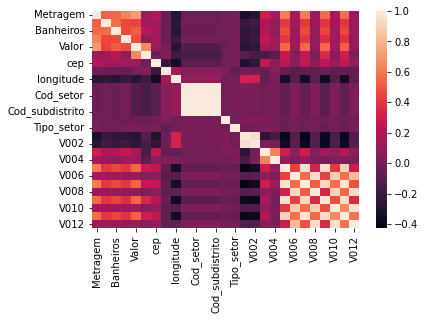

In [78]:
sns.heatmap(df_prices_ibge.corr())

I'll plot the heatmap only with the relevant features

<AxesSubplot:>

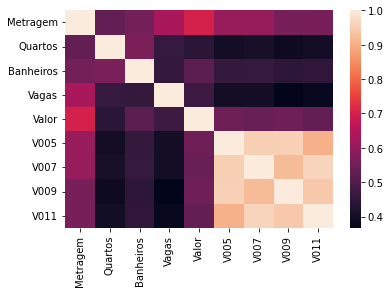

In [79]:
sns.heatmap(df_prices_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor', 'V005', 'V007', 'V009', 'V011']].corr())

We see that ibge data are strongly correlated between them.

## Save dataframe to machine learning models

In [80]:
df_ML = df_prices_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor', 'V005', 'V007', 'V009', 'V011']]

In [81]:
df_ML.isnull().sum()

Metragem     0
Quartos      0
Banheiros    0
Vagas        0
Valor        0
V005         2
V007         2
V009         2
V011         2
dtype: int64

Drop rows with null values

In [82]:
df_ML.drop(df_ML[df_ML['V007'].isnull()].index.tolist(), axis = 0, inplace = True)

C:\Users\andre\AppData\Local\Temp\ipykernel_19648\412242349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML.drop(df_ML[df_ML['V007'].isnull()].index.tolist(), axis = 0, inplace = True)


In [83]:
df_ML.isnull().sum()

Metragem     0
Quartos      0
Banheiros    0
Vagas        0
Valor        0
V005         0
V007         0
V009         0
V011         0
dtype: int64

In [84]:
#Dataframe to use in Machine Learning models
df_ML.to_csv('../data/processed/Data_prices_IBGE.csv', index = False)